<a href="https://colab.research.google.com/github/anoopmoothedath/Mask_RCNN/blob/master/Mask_RCNN_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import utils

In [0]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import warnings

In [3]:
import model as modellib
import coco

Using TensorFlow backend.


In [0]:
ROOT_DIR = os.path.abspath("../")

In [0]:
warnings.filterwarnings("ignore")

In [0]:
sys.path.append(ROOT_DIR) #to find local version of the library

In [0]:
sys.path.append(os.path.join(ROOT_DIR,"")) #to find local version

In [0]:
%matplotlib inline

In [0]:
MODEL_DIR = os.path.join(ROOT_DIR,"logs") #Directory to save logs and trained model

In [0]:
COCO_MODEL_PATH = os.path.join('',"mask_rcnn_coco.h5")   #local path to trained weights file

In [0]:
if not os.path.exists(COCO_MODEL_PATH):
  utils.download_trained_weights(COCO_MODEL_PATH)

In [0]:
IMAGE_DIR = os.path.join(ROOT_DIR,"images")  #Directory of images to run detection on

In [13]:
class InferenceConfig(coco.CocoConfig):
  #batch size = gpu_count + images_per_gpu
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [0]:
model = modellib.MaskRCNN(mode="inference", model_dir='mask_rcnn_coco.hy', config=config) #create model object in inference mode

In [0]:
model.load_weights('mask_rcnn_coco.h5', by_name=True)  #load weights trained on MS-COCO

In [0]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']  #COCO Class names

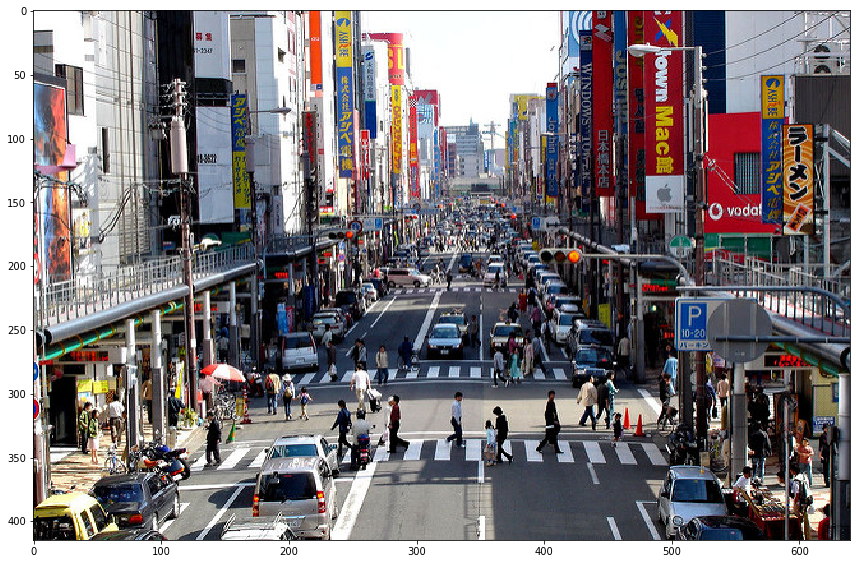

In [31]:
#Loading random image
image = skimage.io.imread('images/busyroad.jpg')

#original image
plt.figure(figsize=(12,10))
skimage.io.imshow(image)

In [32]:
#run detection
results = model.detect([image], verbose=1)

Processing 1 images
image                    shape: (415, 640, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 93)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


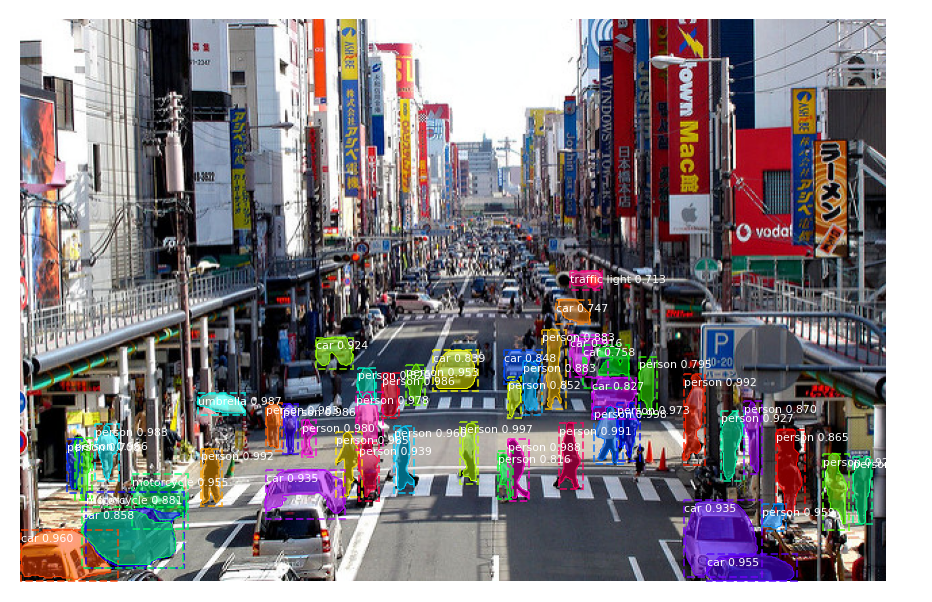

In [33]:
#visualize results
import visualize
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [34]:
mask = r['masks']
mask = mask.astype(int)
mask.shape

(415, 640, 47)

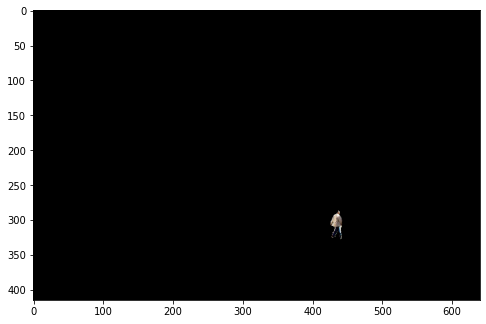

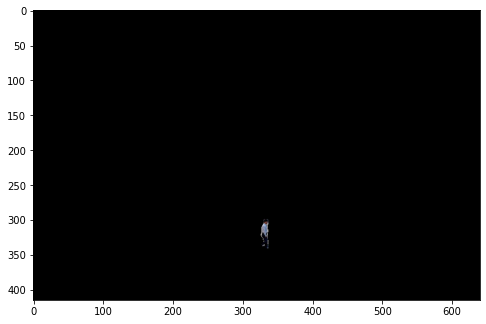

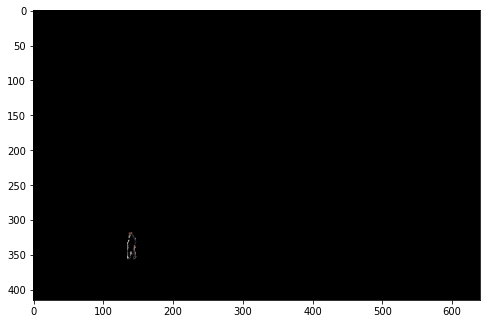

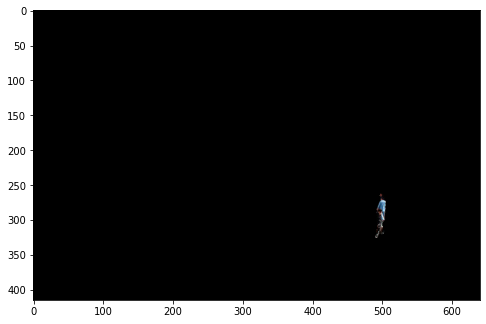

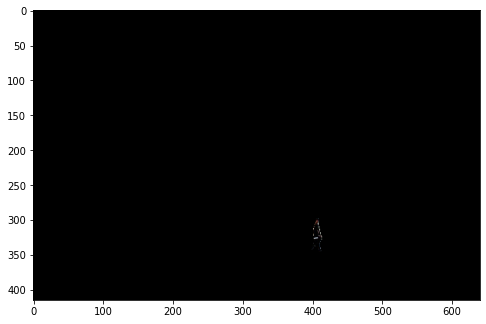

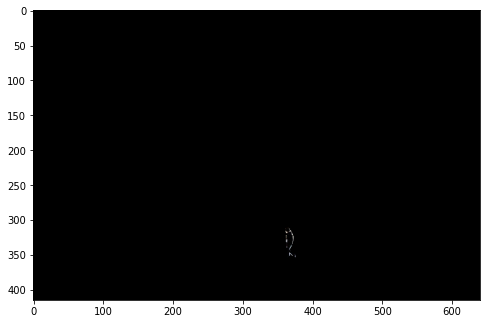

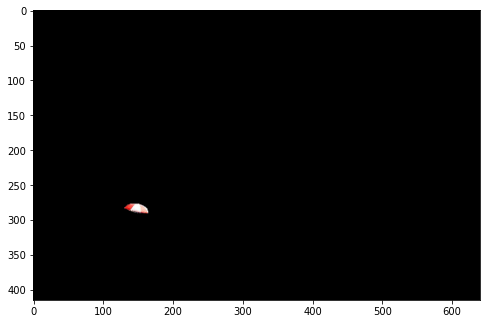

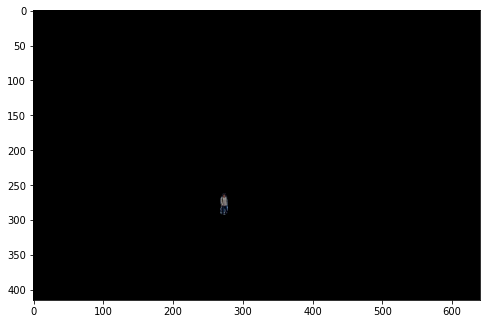

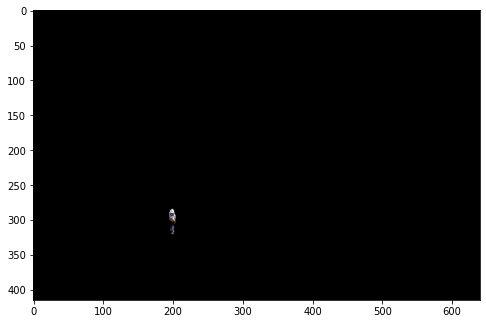

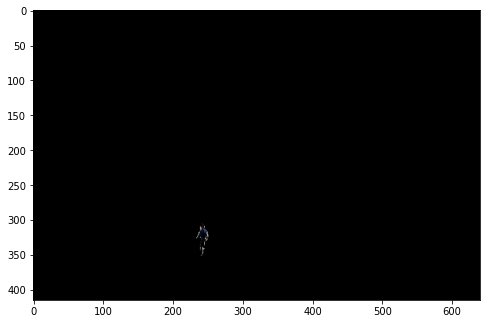

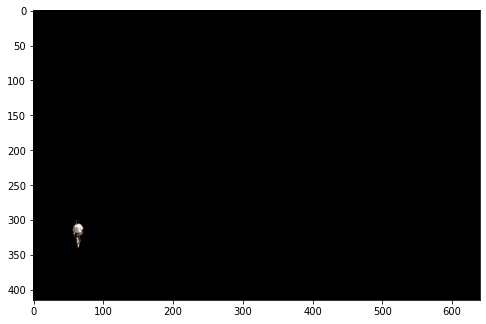

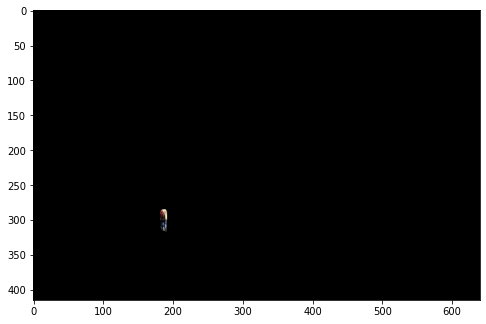

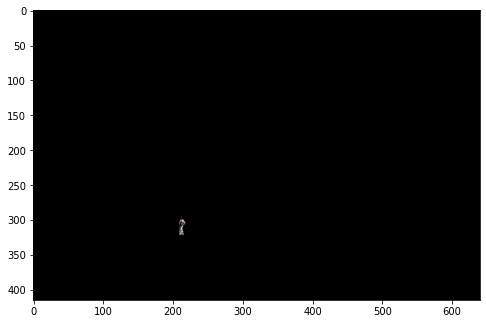

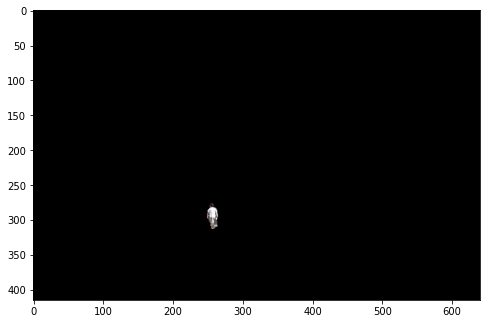

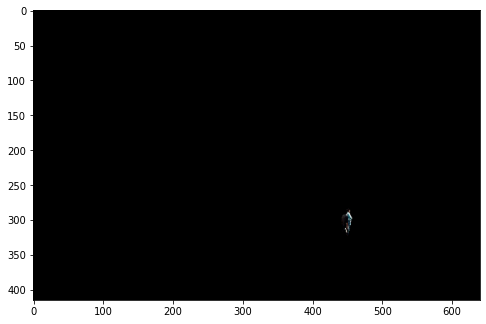

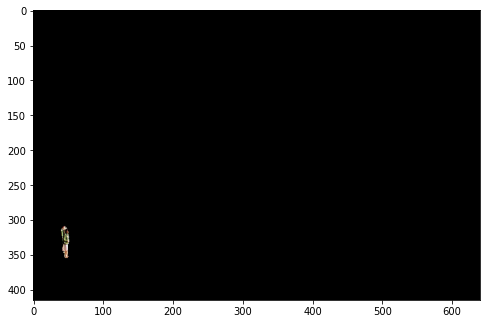

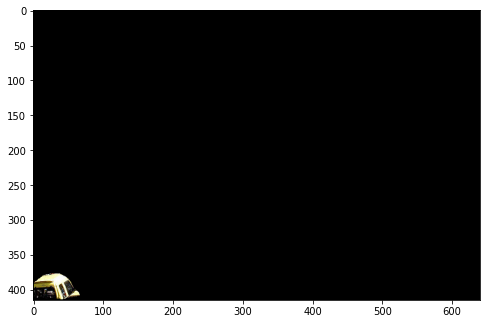

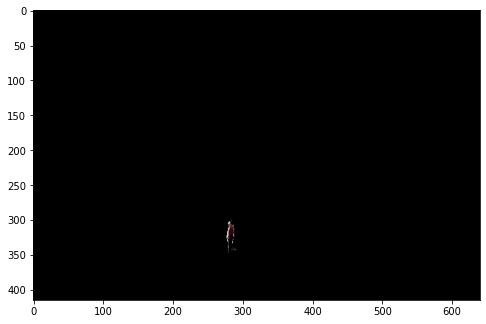

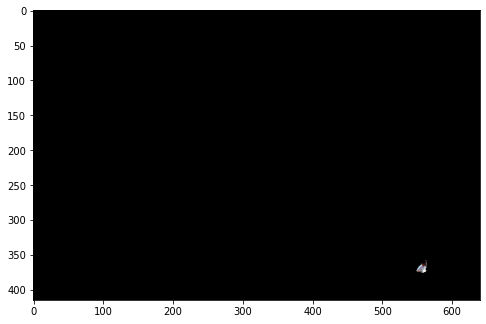

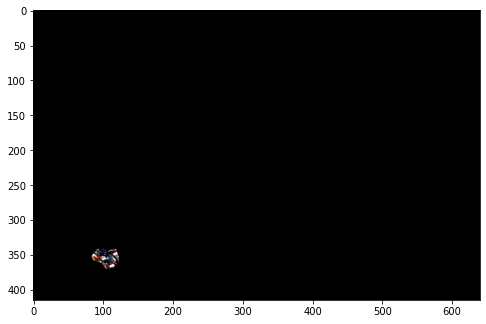

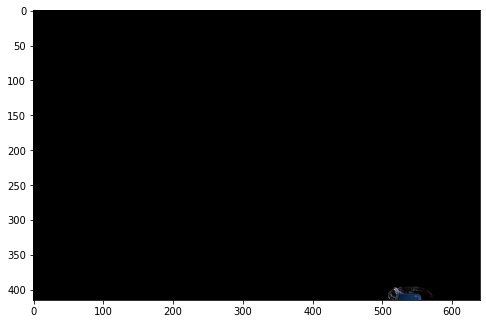

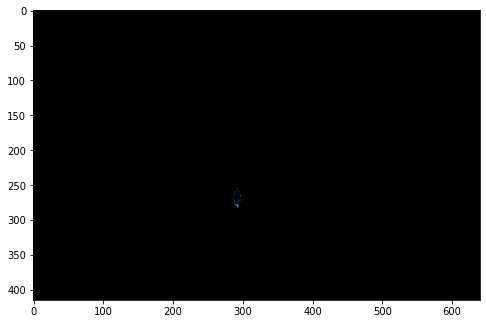

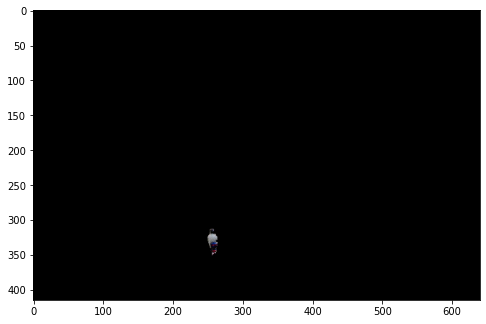

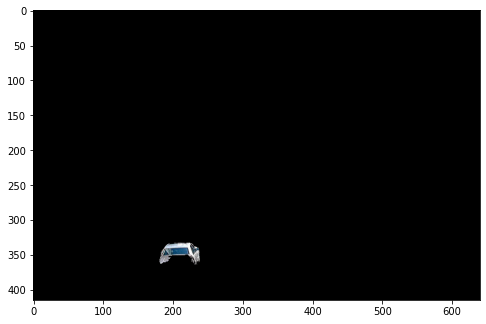

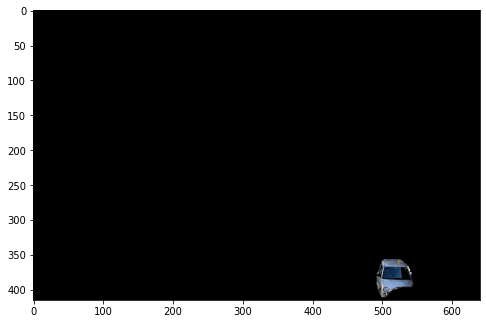

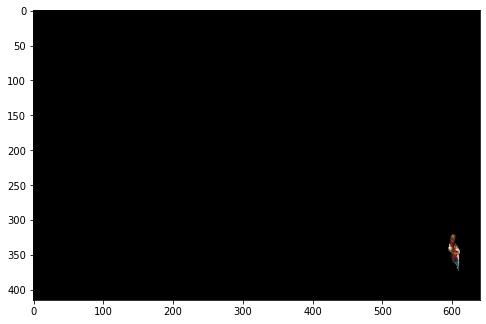

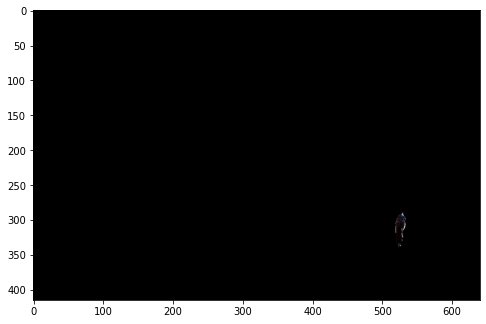

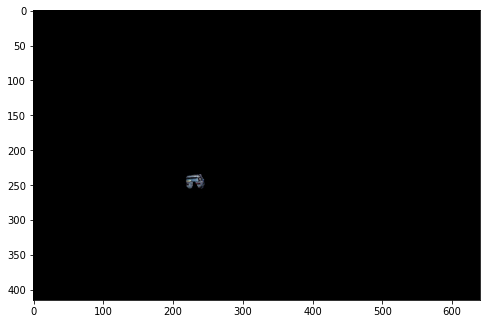

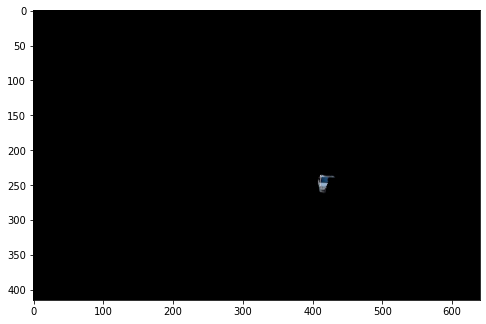

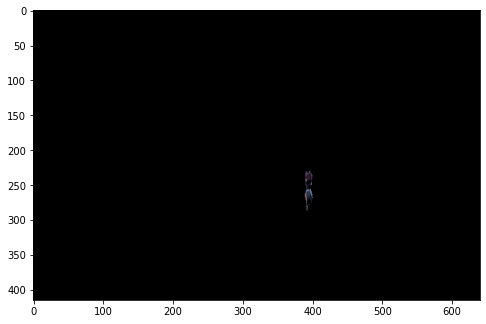

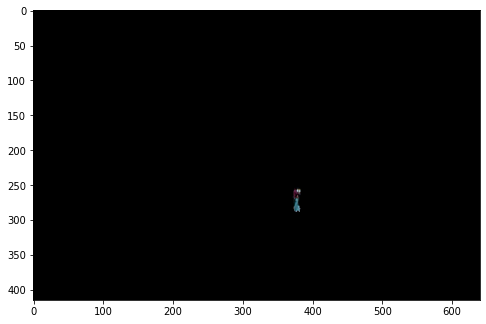

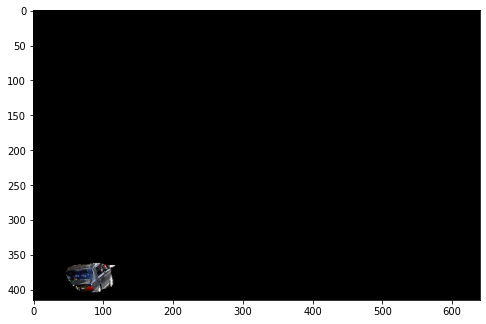

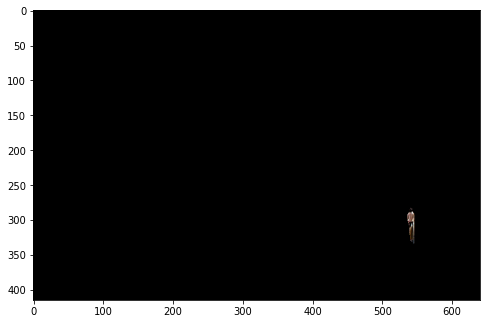

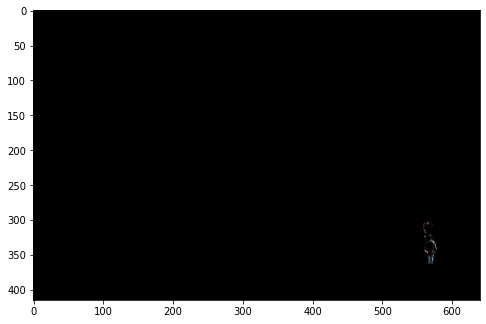

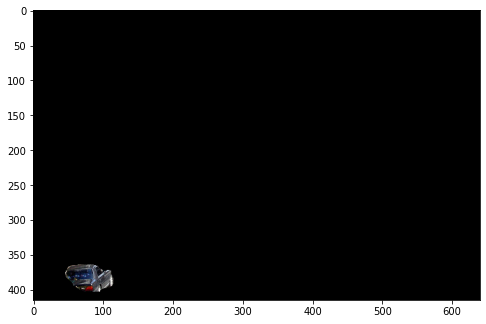

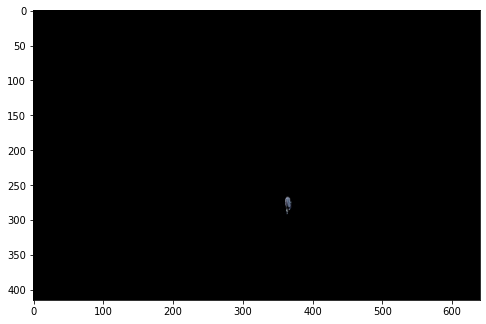

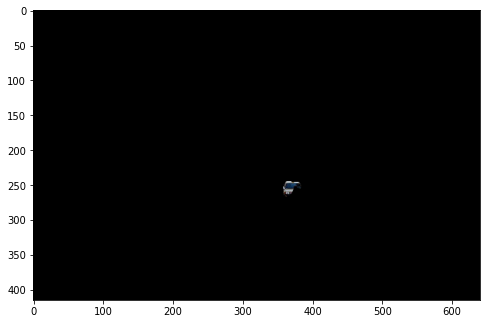

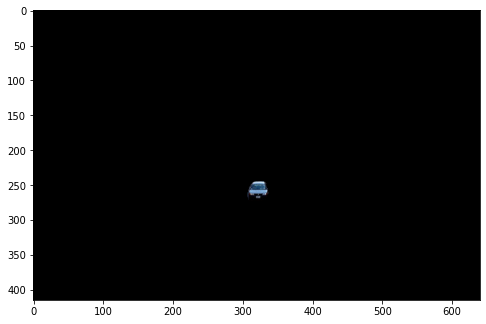

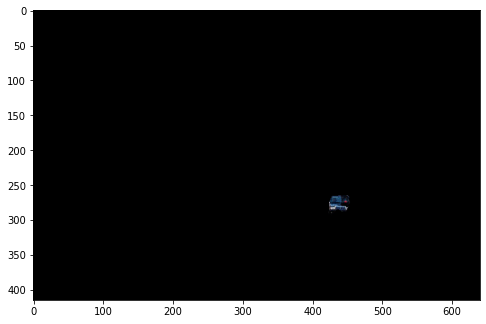

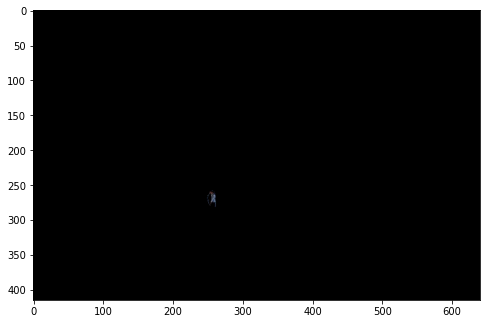

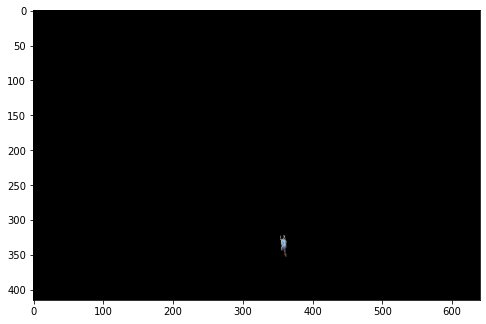

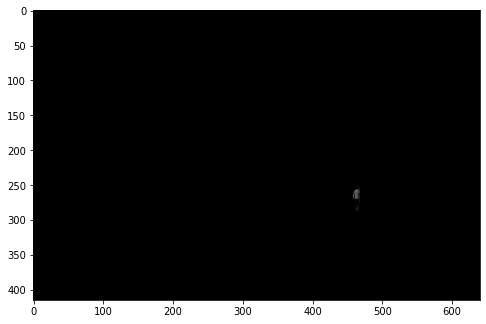

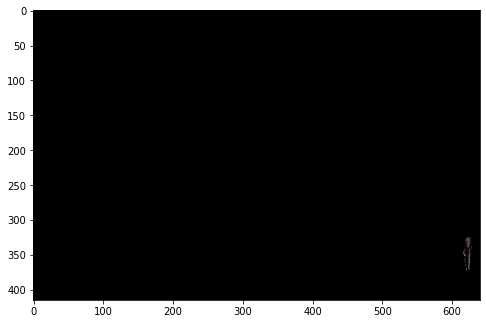

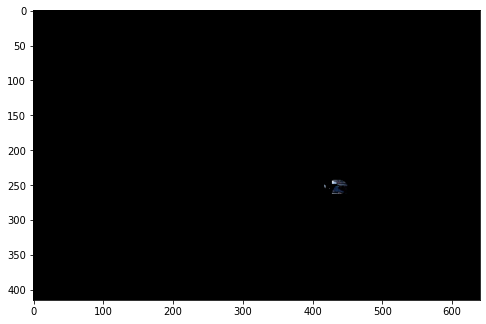

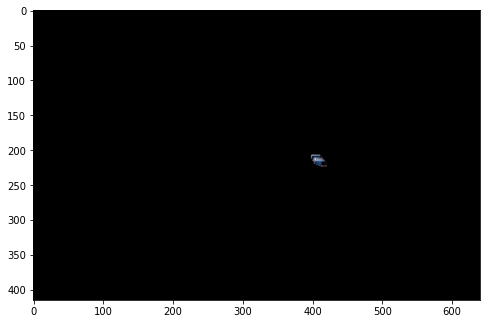

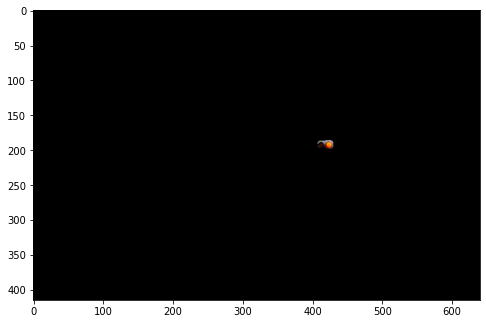

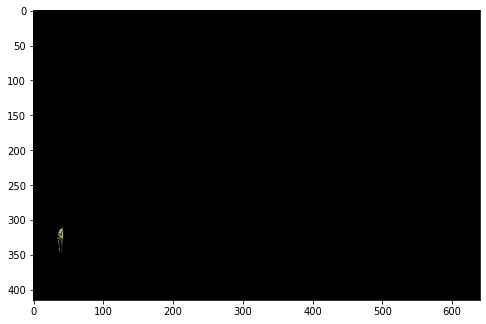

In [35]:
for i in range(mask.shape[2]):
  temp = skimage.io.imread('images/busyroad.jpg')
  for j in range(temp.shape[2]):
    temp[:,:,j] = temp[:,:,j] * mask[:,:,i]
  plt.figure(figsize=(8,8))
  plt.imshow(temp)  